<a href="https://colab.research.google.com/github/nikhil-095/Demo_Team_Phoenix/blob/main/We4techdraft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic python library which need to import
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Problem Statement : Analysing profiles of 2019 general election candidates using attributes like criminal cases, caste category , education , gender , age, total votes etc . The sample dataset contains 2263 records with 19 attributes.

In [ ]:
# reading data into dataframe
import io
df2 = pd.read_csv('Election_Data.csv')
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
df2.shape

(2263, 19)

In [ ]:
# Description of data set
df2.describe()

Overview of Profile of Candidates

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
fig = px.scatter(df2, 
                 x='AGE', 
                 y='CRIMINAL\nCASES', 
                 color='WINNER', 
                 opacity=0.8, 
                 hover_data=['GENDER','CATEGORY','STATE','PARTY','NAME','EDUCATION'], 
                 title='Age vs Crime vs Winner vs Gender vs Category vs State vs Party vs Education')
fig.update_traces(marker_size=5)
fig.show()

Interactive filter plot based on Education,Constituency & State

In [ ]:
fig = px.scatter(df2, 
                 x="AGE", 
                 y="EDUCATION", 
                 animation_frame="STATE", 
                 animation_group="PARTY",
#                  size="pop",     
                 color="PARTY", 
                 hover_name="CONSTITUENCY",
                 log_x=True, 
                 size_max=80, 
                 range_x=[20,90], 
                 range_y=[0,7])

fig.show()

In [ ]:
#Correlation between data
df2.corr()

,WINNER,AGE,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
WINNER,1.000000,0.110294,0.725678,0.520286,0.726125,0.738976,0.757303,0.038107
AGE,0.110294,1.000000,0.208567,0.129360,0.208600,0.207304,0.223700,0.021083
GENERAL\nVOTES,0.725678,0.208567,1.000000,0.616742,0.999988,0.962219,0.962905,0.211092
POSTAL\nVOTES,0.520286,0.129360,0.616742,1.000000,0.620614,0.630882,0.634896,0.038453
TOTAL\nVOTES,0.726125,0.208600,0.999988,0.620614,1.000000,0.962441,0.963150,0.210515
OVER TOTAL ELECTORS \nIN CONSTITUENCY,0.738976,0.207304,0.962219,0.630882,0.962441,1.000000,0.977416,0.009227
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,0.757303,0.223700,0.962905,0.634896,0.963150,0.977416,1.000000,0.072228
TOTAL ELECTORS,0.038107,0.021083,0.211092,0.038453,0.210515,0.009227,0.072228,1.000000


Missing Value Treatment

In [ ]:
# Checking the Null Value in the Dataset
df2.isnull().values.any()

True

In [ ]:
# Crime Cases Count
df2['CRIMINAL\nCASES'].value_counts()
df2['CRIMINAL\nCASES'] = df2['CRIMINAL\nCASES'].replace(['Not Available'],'0')
df2['CRIMINAL\nCASES'] = pd.to_numeric(df2['CRIMINAL\nCASES'] , errors='coerce')
df2['CRIMINAL\nCASES'].value_counts()
df2['CRIMINAL\nCASES'].isna()


0       False
1       False
2       False
3        True
4       False
        ...  
2258    False
2259    False
2260    False
2261    False
2262     True
Name: CRIMINAL\nCASES, Length: 2263, dtype: bool

In [ ]:
# Here we are removing the null values from the column criminal in the dataset
df2['CRIMINAL\nCASES'].isnull().sum().sum()

245

In [ ]:
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


Key Performance Indicators

1.Education Vs Crimes committed by the candidates

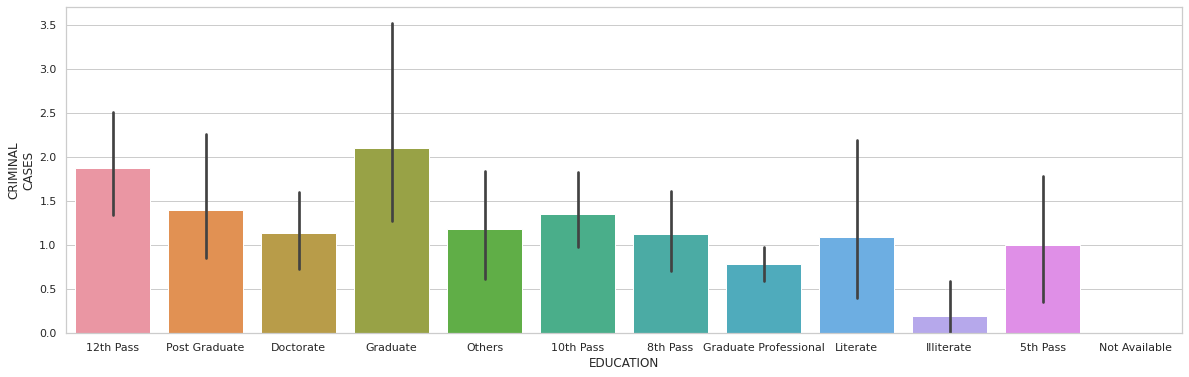

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
ax = sns.barplot(x="EDUCATION", y="CRIMINAL\nCASES", data=df2)

2.Candidates based on the category

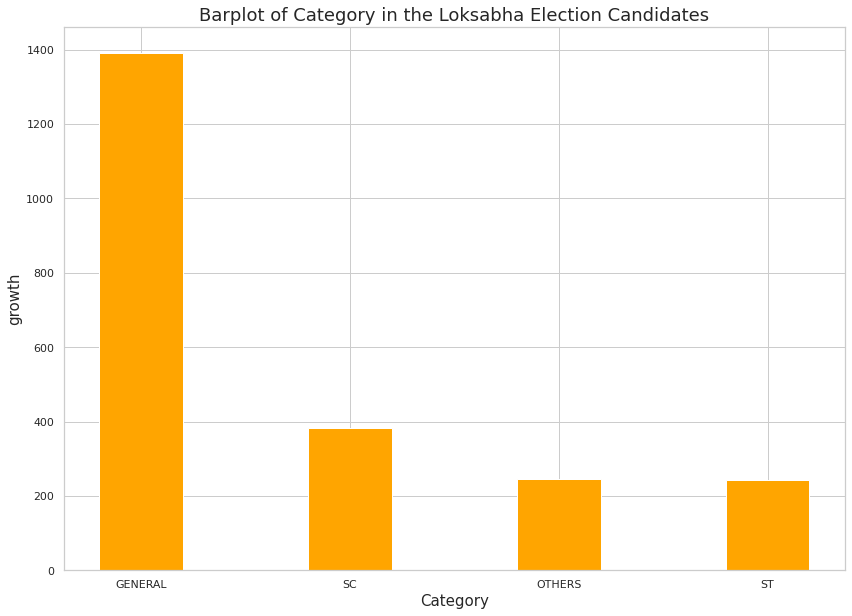

In [ ]:
consumption = ['SC','ST','GENERAL','OTHERS']
cat1= int (0)
cat2= int (0)
cat3= int (0)
cat4= int (0)
for i in df2['CATEGORY']:
  if i=='SC':
    cat1+=1
  elif i=='ST':
    cat2+=1
  elif i=='GENERAL':
    cat3+=1
  else:
    cat4+=1
growth = [cat1,cat2,cat3,cat4]
# Create a pandas dataframe
df = pd.DataFrame({"consumption": consumption,
"growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='orange',
width = 0.4)
plt.xlabel("Category", size=15)
plt.ylabel("growth", size=15)
plt.title("Barplot of Category in the Loksabha Election Candidates", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")

3. Total number of allocation of candidates for different parties in different constituencies in India.

In [ ]:
df2.PARTY.value_counts()

BJP     420
INC     413
NOTA    245
IND     201
BSP     163
       ... 
WPOI      1
SJDD      1
MSHP      1
JHP       1
ASDC      1
Name: PARTY, Length: 133, dtype: int64

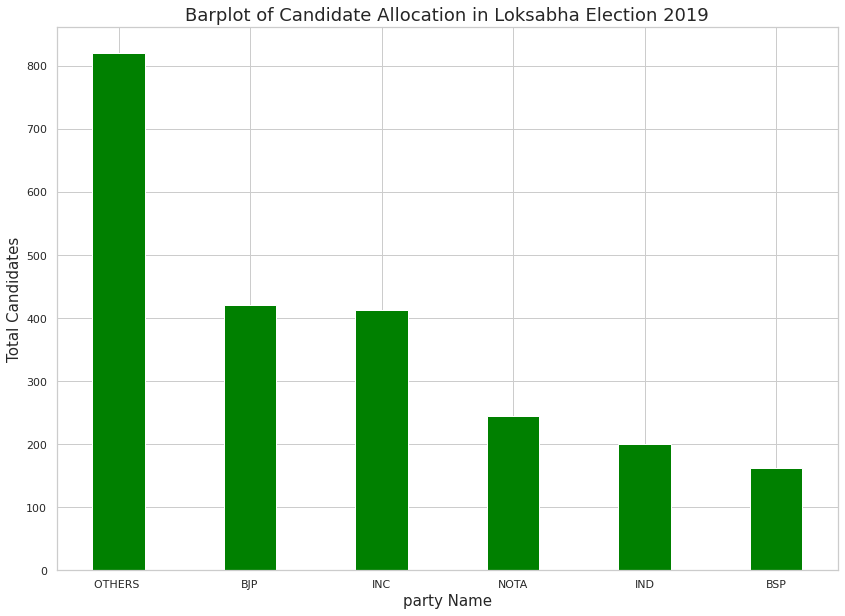

In [ ]:
consumption = ['BJP','INC','NOTA','IND','BSP','OTHERS ']
party1= int (0)
party2= int (0)
party3= int (0)
party4= int (0)
party5= int (0)
party6= int (0)
for i in df2['PARTY']:
  if i=='BJP':
    party1+=1
  elif i=='INC':
    party2+=1
  elif i=='NOTA':
    party3+=1
  elif i=='IND':
    party4+=1
  elif i=='BSP':
    party5+=1
  else :
    party6+=1
growth = [party1,party2,party3,party4,party5,party6]
df = pd.DataFrame({"consumption": consumption,
"growth": growth})
df_sorted_desc= df.sort_values('growth',ascending=False)
plt.figure(figsize=(14,10))
# make bar plot with matplotlib
plt.bar('consumption', 'growth',data=df_sorted_desc,color ='green',
width = 0.4)
plt.xlabel("party Name", size=15)
plt.ylabel("Total Candidates", size=15)
plt.title("Barplot of Candidate Allocation in Loksabha Election 2019", size=18)
plt.savefig("bar_plot_matplotlib_Python.png")

4.Gender wise split up of candidates allocation in Loksabha Election


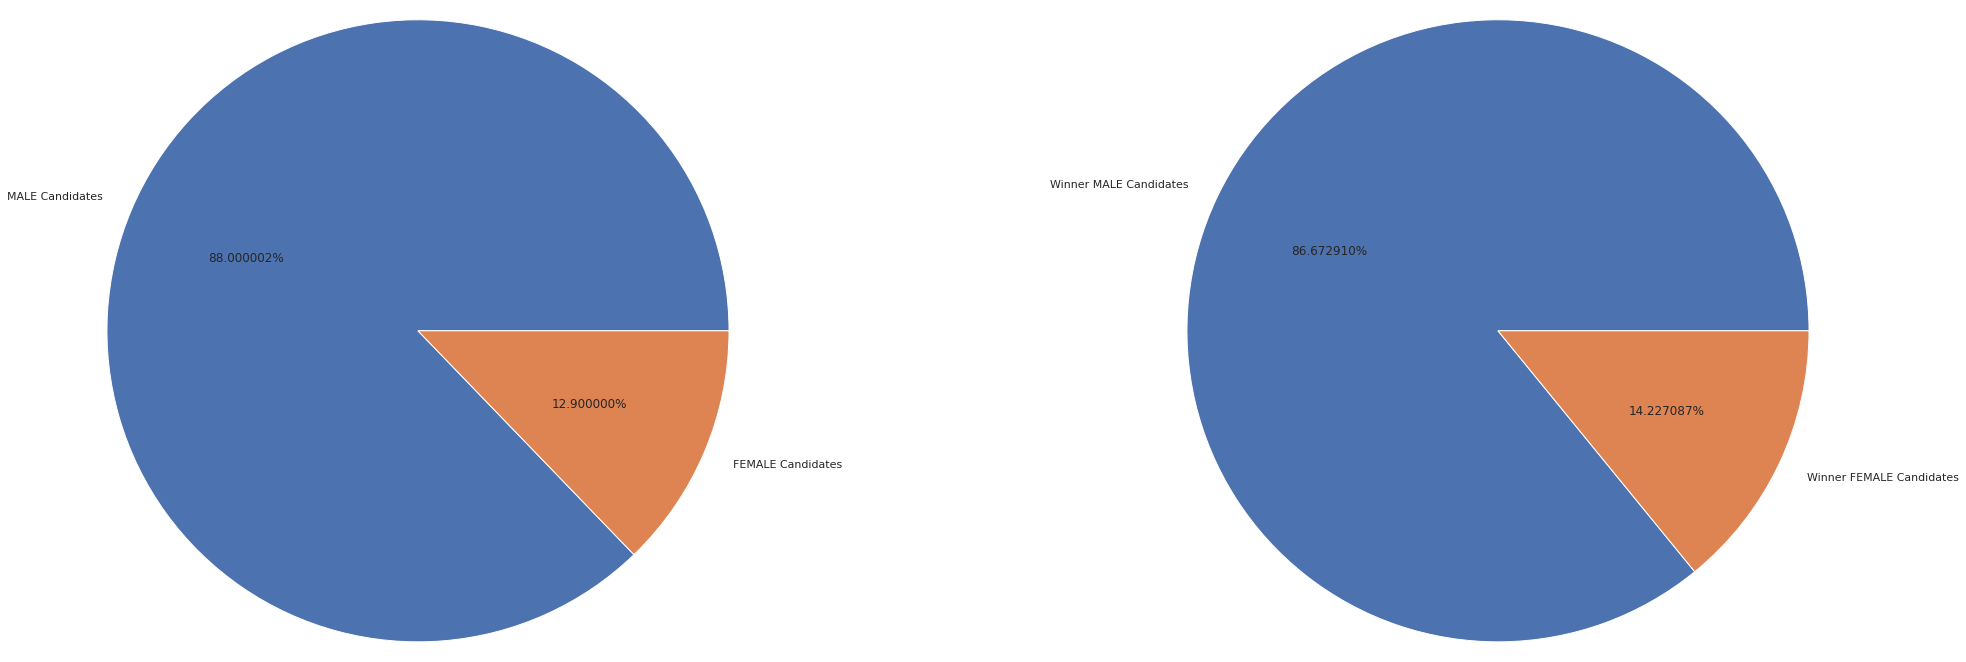

In [ ]:
male=0
female=0
male_w=0
female_w=0

for i in range (len(df2)):
  gender=df2.iloc[i,6]
  w=df2.iloc[i,3]
  if gender == 'MALE':
    male=male+1
  if gender == 'FEMALE':
    female=female+1
  if gender == 'MALE' and w >0:
    male_w=male_w + 1
  if gender == 'FEMALE' and w >0:
    female_w=female_w + 1
y = np.array([male,female])
t1=sum(y)
mylabelsy = ["MALE Candidates","FEMALE Candidates"]
z= np.array([male_w,female_w])
t2=sum(z)
mylabelsz = ["Winner MALE Candidates","Winner FEMALE Candidates"]
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1.5, 1.5], aspect=1)
ax1.pie(y, labels=mylabelsy, radius = 1.2, autopct=lambda p: '{:0f}%'.format(p*t1 / 2000) )
ax2 = fig.add_axes([1.5, .0, 1.5, 1.5], aspect=1)
ax2.pie(z, labels=mylabelsz, radius = 1.2, autopct=lambda p: '{:0f}%'.format(p*t1 / 2000))
plt.show()


5.Statewise Criminal cases on Candidates 

In [ ]:
shp_gdf = gpd.read_file('/content/StateBoundary.shp')
shp_gdf

,state,geometry
0,ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
1,CHANDIGARH,"POLYGON ((8546255.616 3606050.813, 8546315.400..."
2,DADAR & NAGAR HAVELI,"MULTIPOLYGON (((8137193.486 2315664.964, 81373..."
3,DAMAN & DIU,"MULTIPOLYGON (((8111624.471 2328002.898, 81117..."
4,DELHI,"POLYGON ((8583390.570 3359116.190, 8583476.212..."
5,HARYANA,"POLYGON ((8524318.539 3516490.865, 8524451.392..."
6,JHARKHAND,"POLYGON ((9762288.285 2772949.712, 9762301.816..."
7,KARNATAKA,"MULTIPOLYGON (((8608594.474 2090389.205, 86086..."
8,KERALA,"POLYGON ((8347733.191 1436381.747, 8347795.745..."
9,LAKSHADWEEP,"MULTIPOLYGON (((8135256.290 930182.487, 813526..."


In [ ]:
import io
df2 = pd.read_csv('Election_Data.csv')
df2= df2.replace(['NCT OF Delhi'],'Delhi')
df2['STATE'] = df2['STATE'].str.upper()
df2.head()
df2.shape
(2263, 19)
df2.info()
df2.describe()
df2.isnull().values.any()
df2.rename(columns={'CRIMINAL\nCASES': 'criminal'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [ ]:
df2['criminal'].value_counts()
df2['criminal'] = df2['criminal'].replace(['Not Available'],'0')
df2['criminal'] = pd.to_numeric(df2['criminal'] , errors='coerce')
df2['criminal'].value_counts()
df2['criminal'].isna()

0       False
1       False
2       False
3        True
4       False
        ...  
2258    False
2259    False
2260    False
2261    False
2262     True
Name: criminal, Length: 2263, dtype: bool

In [ ]:
df2['criminal'].isnull().sum().sum()
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,TELANGANA,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,TELANGANA,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,TELANGANA,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,TELANGANA,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,UTTAR PRADESH,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
state_criminal = df2.groupby('STATE')[['criminal']].sum().sort_values(by=
['criminal']).sort_values(by=['STATE'])
state_criminal_winner = df2[df2['WINNER']>0].groupby('STATE')[['criminal']].sum().sort_values(by=
['criminal']).sort_values(by=['STATE'])
state_criminal.to_csv('/content/xx.csv')
df=pd.read_csv('xx.csv')

In [ ]:
merged = shp_gdf.set_index('state').join(df.set_index('STATE'))
merged

,geometry,criminal
ANDAMAN & NICOBAR,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",NaN
ANDHRA PRADESH,"POLYGON ((9426056.496 2174632.352, 9426228.484...",81.0
ARUNACHAL PRADESH,"POLYGON ((10696175.277 3434232.650, 10696981.8...",2.0
ASSAM,"POLYGON ((10380499.251 2872443.723, 10380499.2...",21.0
BIHAR,"POLYGON ((9362949.333 3188807.607, 9362966.106...",312.0
CHANDIGARH,"POLYGON ((8546255.616 3606050.813, 8546315.400...",0.0
CHHATTISGARH,"POLYGON ((9275926.808 2765881.317, 9276185.437...",10.0
DADAR & NAGAR HAVELI,"MULTIPOLYGON (((8137193.486 2315664.964, 81373...",NaN
DAMAN & DIU,"MULTIPOLYGON (((8111624.471 2328002.898, 81117...",13.0
DELHI,"POLYGON ((8583390.570 3359116.190, 8583476.212...",11.0


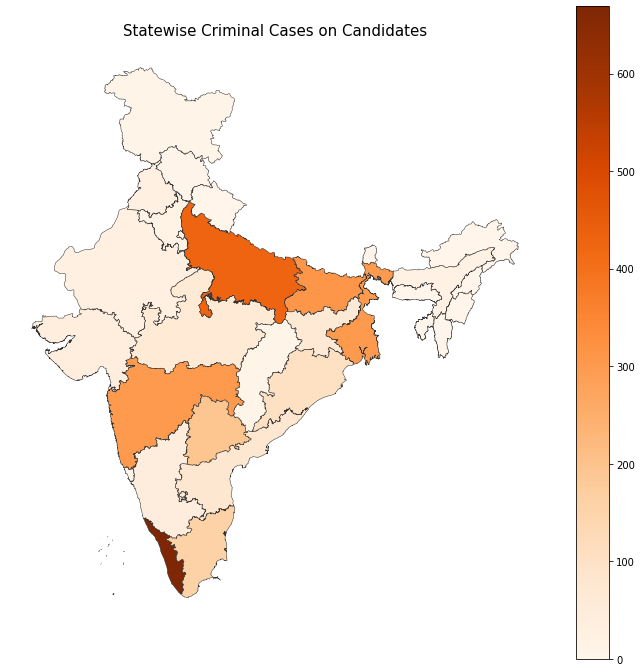

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Statewise Criminal Cases on Candidates',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='criminal', cmap='Oranges', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

5. Age wise criminal case on Candidates

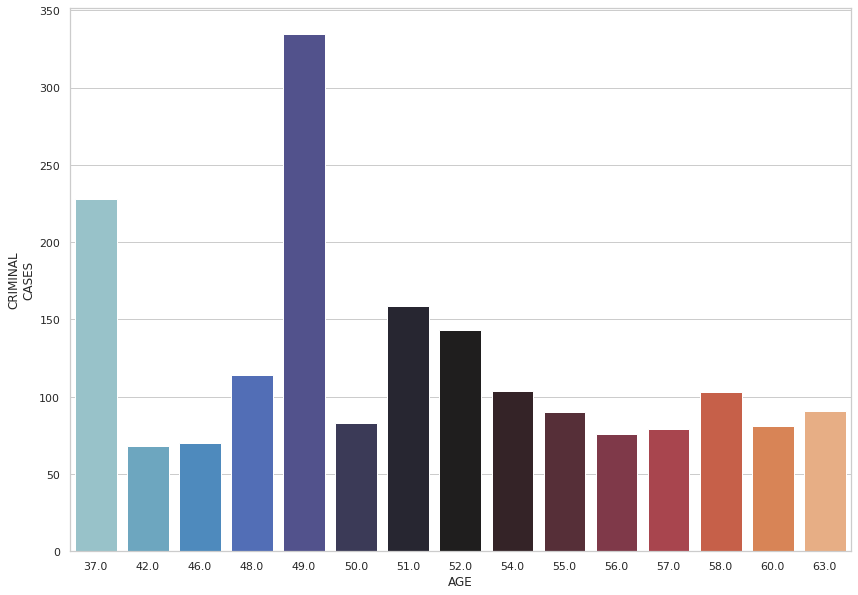

In [ ]:

df2['CRIMINAL\nCASES'] = pd.to_numeric(df2['CRIMINAL\nCASES'] , errors='coerce')
age_criminal = df2[df2['CRIMINAL\nCASES']>0].groupby('AGE')[['CRIMINAL\nCASES']].sum().sort_values(by=
                        ['CRIMINAL\nCASES']).tail(15).sort_values(by=['AGE'])
age_criminal
plt.figure(figsize=(14,10))
sns.barplot(x = age_criminal.index , y = age_criminal['CRIMINAL\nCASES'] , palette='icefire');


7.State Vs Total votes

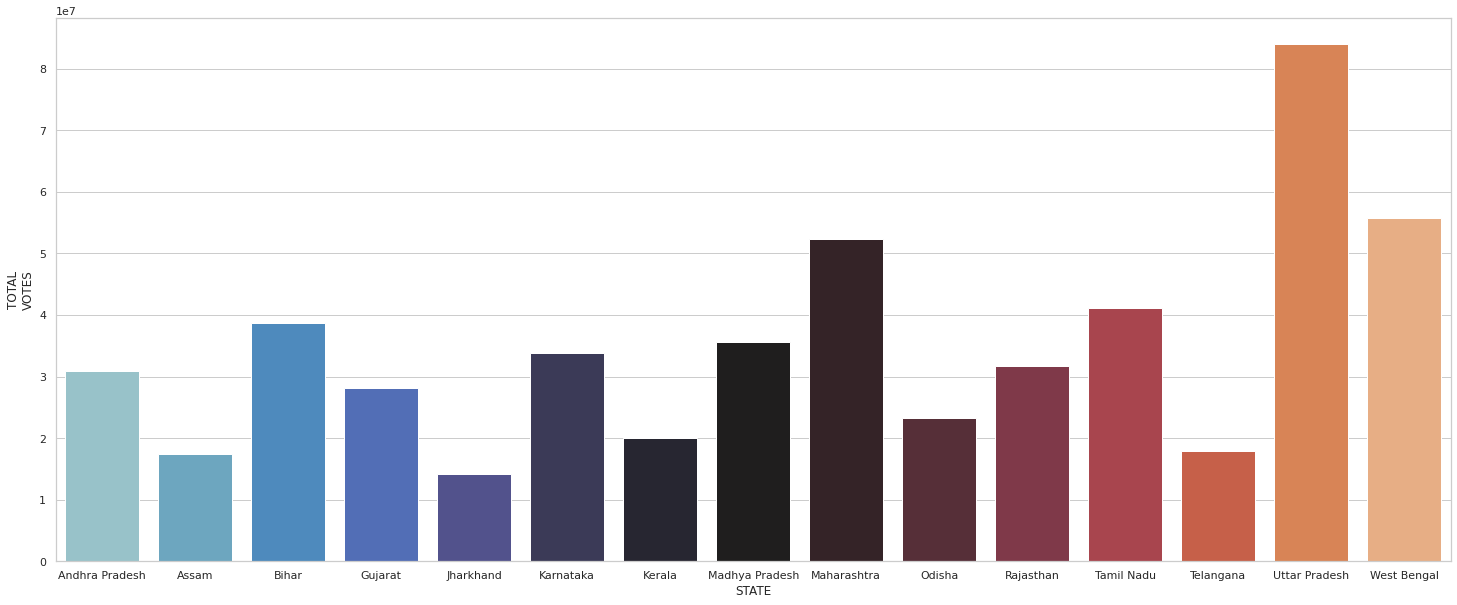

In [ ]:
total_voter1 = df2[df2['TOTAL\nVOTES']>0].groupby('STATE')[['TOTAL\nVOTES']].sum().sort_values(by=
                        ['TOTAL\nVOTES']).tail(15).sort_values(by=['STATE'])

total_voter1
plt.figure(figsize=(25,10))
sns.barplot(x = total_voter1.index , y = total_voter1['TOTAL\nVOTES'] , palette='icefire');

8.Average Age of Candidates Statewise

In [ ]:
state_criminal = df2.groupby('STATE')[['AGE']].mean().apply(np.ceil)
state_criminal.to_csv('/content/age.csv')
df3=pd.read_csv('age.csv')
df3

,STATE,AGE
0,Andaman & Nicobar Islands,51.0
1,Andhra Pradesh,54.0
2,Arunachal Pradesh,52.0
3,Assam,53.0
4,Bihar,49.0
5,Chandigarh,65.0
6,Chhattisgarh,50.0
7,Dadra & Nagar Haveli,41.0
8,Daman & Diu,50.0
9,Goa,60.0


9.Parties Promoting Young Candidates 

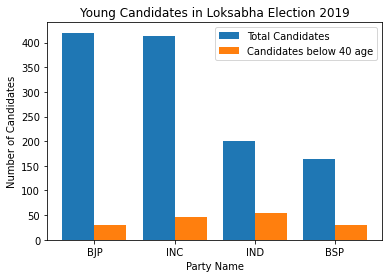

In [ ]:
bjp_count=0
inc_count=0
bsp_count=0
ind_count=0
total_bjp=0
total_inc=0
total_bsp=0
total_ind=0
for i in range (len(df2)):
  a=df2.iloc[i,8]
  p=df2.iloc[i,4]
  if p== 'BJP' :
    total_bjp=total_bjp + 1
  if a < 40 and p == 'BJP':
    bjp_count=bjp_count + 1
  
for i in range (len(df2)):
  a=df2.iloc[i,8]
  p=df2.iloc[i,4]
  if p== 'INC' :
    total_inc=total_inc + 1
  if a < 40 and p == 'INC':
    inc_count=inc_count + 1
  

for i in range (len(df2)):
  a=df2.iloc[i,8]
  p=df2.iloc[i,4]
  if p== 'BSP' :
    total_bsp=total_bsp + 1
  if a < 40 and p == 'BSP':
    bsp_count=bsp_count + 1
  

for i in range (len(df2)):
  a=df2.iloc[i,8]
  p=df2.iloc[i,4]
  if p== 'IND' :
    total_ind=total_ind + 1
  if a < 40 and p == 'IND':
    ind_count=ind_count + 1
  
consumption = ['BJP','INC','IND','BSP']
total=[total_bjp , total_inc , total_ind , total_bsp]
young= [bjp_count , inc_count , ind_count , bsp_count]
X_axis = np.arange(len(consumption))
plt.bar(X_axis - 0.2, total, 0.4, label = 'Total Candidates')
plt.bar(X_axis + 0.2, young, 0.4, label = 'Candidates below 40 age')
plt.xticks(X_axis, consumption)
plt.xlabel("Party Name")
plt.ylabel("Number of Candidates")
plt.title("Young Candidates in Loksabha Election 2019")
plt.legend()
plt.show()



10.General Profile of Candidates in National Parties

In [ ]:
import io
df2 = pd.read_csv('Election_Data.csv')
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


11.Test

In [ ]:
df2.dropna(subset=["criminal"], inplace=True)
df2.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,criminal,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,TELANGANA,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52.0,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,TELANGANA,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0.0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,TELANGANA,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3.0,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,UTTAR PRADESH,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5.0,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,UTTAR PRADESH,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0.0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


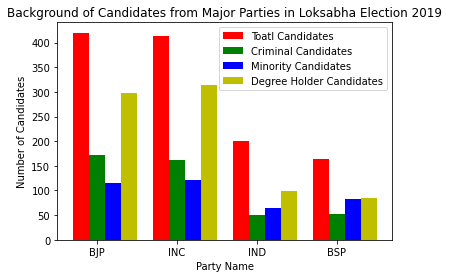

In [ ]:
bjp_crim=0
inc_crim=0
bsp_crim=0
ind_crim=0
bjp_min=0
inc_min=0
bsp_min=0
ind_min=0
bjp_edu=0
inc_edu=0
bsp_edu=0
ind_edu=0

for i in range (len(df2)):
  a=df2.iloc[i,7]
  p=df2.iloc[i,4]
  b=df2.iloc[i,9]
  c=df2.iloc[i,10]
  if a > 0 and p == 'BJP':
    bjp_crim=bjp_crim + 1
  if a > 0 and p == 'INC':
    inc_crim=inc_crim + 1
  if a > 0 and p == 'BSP':
    bsp_crim=bsp_crim + 1
  if a > 0 and p == 'IND':
    ind_crim=ind_crim + 1
  if b != 'GENERAL' and p == 'BJP':
    bjp_min=bjp_min + 1
  if b != 'GENERAL' and p == 'INC':
    inc_min=inc_min + 1
  if b != 'GENERAL' and  p == 'BSP':
    bsp_min=bsp_min + 1
  if b != 'GENERAL' and p == 'IND':
    ind_min=ind_min + 1  
  if c == 'Graduate' or  c == 'Post Graduate' or c == 'Graduate Professional' or c == 'Doctorate':
    if p== 'BJP':
      bjp_edu=bjp_edu + 1
    elif p == 'INC':
      inc_edu=inc_edu + 1
    elif p == 'BSP':
      bsp_edu=bsp_edu + 1
    elif p == 'IND':
      ind_edu=ind_edu + 1

    


N = 4
ind = np.arange(N) 
width = 0.2
total= [total_bjp , total_inc, total_ind , total_bsp]
bar1 = plt.bar(ind, total, width, color = 'r')
crim= [bjp_crim , inc_crim, ind_crim , bsp_crim]
bar2 = plt.bar(ind+width, crim, width, color = 'g')
min= [bjp_min , inc_min, ind_min , bsp_min]
bar3 = plt.bar(ind+width*2, min, width, color = 'b')
edu= [bjp_edu , inc_edu, ind_edu , bsp_edu]
bar4 = plt.bar(ind+width*3, edu, width, color = 'y')
plt.xlabel("Party Name")
plt.ylabel('Number of Candidates')
plt.title("Background of Candidates from Major Parties in Loksabha Election 2019")
plt.xticks(ind+width,['BJP', 'INC', 'IND', 'BSP'])
plt.legend( (bar1, bar2, bar3, bar4), ('Toatl Candidates', 'Criminal Candidates', 'Minority Candidates', 'Degree Holder Candidates') )
plt.show()
